In [2]:
# Libraries

# Data
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import plotly.express as px

# Preprocessing
# Encoding
import category_encoders as ce
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler, RobustScaler, MinMaxScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import RandomOverSampler, ADASYN, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks

# Model
import multiprocessing
import time
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier

# Model Evaluation
from sklearn.feature_selection import SelectPercentile
from sklearn.metrics import confusion_matrix
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, HalvingGridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, RocCurveDisplay, PrecisionRecallDisplay, recall_score, f1_score, roc_auc_score, balanced_accuracy_score, average_precision_score

# Introduction

## Latar Belakang

Dalam dunia asuransi, kemampuan untuk memprediksi klaim dengan akurat sangat penting untuk meminimalisir risiko dan mempertahankan keuntungan perusahaan. Proses klaim yang cepat dan efisien menjadi kunci dalam meningkatkan kepuasan pelanggan sekaligus menjaga keberhasilan operasional bisnis. Namun, penanganan klaim pelanggan memerlukan evaluasi berbagai aspek dan pengambilan keputusan yang tepat, menjadikannya proses yang kompleks. Tantangan yang sering dihadapi perusahaan asuransi meliputi pengelolaan jumlah klaim, mendeteksi klaim yang bersifat fraud, serta memastikan klaim dapat diselesaikan dengan adil dan tepat waktu.

Oleh karena itu, penerapan teknologi machine learning dapat memberikan manfaat besar dalam meningkatkan akurasi dan efisiensi pengelolaan klaim. Dengan membangun sistem prediksi status klaim yang andal, perusahaan asuransi dapat mempercepat proses operasional, memperbaiki pengalaman pelanggan, dan mengoptimalkan distribusi sumber daya yang dimiliki.

## Tujuan
Proyek ini bertujuan untuk membangun model prediksi yang mampu menentukan status klaim asuransi pelanggan secara akurat. Model ini dirancang untuk memanfaatkan data historis dengan mengintegrasikan informasi penting tentang pelanggan, rincian klaim, serta faktor-faktor kontekstual lainnya, sehingga dapat menghasilkan keputusan yang lebih presisi terkait klaim, baik itu disetujui maupun ditolak.

Dengan mengembangkan sistem berbasis machine learning, perusahaan berharap dapat mempercepat dan meningkatkan akurasi dalam pemrosesan klaim. Pendekatan ini tidak hanya akan mengurangi potensi kesalahan dalam pengambilan keputusan, tetapi juga mempersingkat waktu tunggu pelanggan secara signifikan.

Selain itu, proyek ini juga bertujuan untuk menganalisis hubungan antar fitur dalam dataset guna mengidentifikasi variabel-variabel yang berpengaruh besar terhadap status klaim, sehingga dapat memberikan wawasan yang lebih mendalam dalam proses pengelolaan klaim.


## Pendekatan Analisis
Salah satu tantangan yang mungkin dihadapi dalam pengembangan model machine learning adalah terjadinya kesalahan prediksi, yaitu Type Error 1 dan Type Error 2.

  - **Type Error 1 (False Positive)**: Kesalahan ini terjadi ketika model secara keliru mengidentifikasi klaim sebagai disetujui (positif), padahal sebenarnya klaim tersebut harus ditolak (negatif). Akibatnya, perusahaan dapat mengalami kerugian finansial karena klaim yang tidak valid tetap diproses.
  - **Type Error 2 (False Negative)**: Sebaliknya, kesalahan ini terjadi ketika model memprediksi klaim sebagai ditolak (negatif), padahal klaim tersebut sebenarnya layak untuk disetujui (positif). Hal ini berisiko menyebabkan ketidakpuasan pelanggan dan potensi masalah hukum akibat penolakan klaim yang tidak semestinya.

Untuk memastikan evaluasi yang menyeluruh terhadap kinerja model, digunakan metrik seperti ROC (Receiver Operating Characteristic) dan AUC (Area Under the Curve). Kedua metrik ini membantu mengukur kemampuan model dalam menangani data yang tidak seimbang, sekaligus memberikan gambaran yang lebih lengkap tentang trade-off antara kesalahan Type Error 1 dan Type Error 2. Dengan pendekatan ini, perusahaan dapat membuat keputusan yang lebih akurat terkait persetujuan atau penolakan klaim, sehingga mendukung efisiensi operasional dan kepuasan pelanggan.






# Data Understanding

In [6]:
df=pd.read_csv('data_travel_insurance.csv')
display(df,df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.0,0.00,36,No


None

### Informasi Dataset:

Terdapat 11 kolom dalam dataset Travel Insurance, diantaranay sebagai berikut:

1. `Agency`: The name of the travel insurance agency that sold the policy. It represents different companies or organizations involved in selling travel insurance.

2. `Agency Type`: The type or category of the travel insurance agency, which could indicate whether it is a direct insurer, a broker, or another type of intermediary. Different agency types may have different business models or commission structures.

3. `Distribution Channel`: The method through which the travel insurance was sold, such as online platforms, direct sales, or through third-party partners. This helps understand customer purchasing behavior.

4. `Product Name`: The specific name of the travel insurance product purchased. Different products may offer different levels of coverage, benefits, and pricing.

5. `Gender`: The gender of the insured traveler (e.g., Male or Female). This can be useful for demographic analysis or risk assessment.

6. `Duration`: The length of the insured travel period, typically measured in days. Longer durations may affect insurance premiums and the likelihood of claims.

7. `Destination`: The country or region where the insured traveler is going. The risk level of destinations can vary based on factors such as political stability, healthcare infrastructure, or accident rates.

8. `Net Sales`: The total amount of revenue generated from the travel insurance policy, which is the final price after any discounts or adjustments.

9. `Commission (in value)`: The monetary commission earned by the agency for selling the travel insurance policy. This depends on the agency’s agreement with the insurer and the policy's price.

10. `Age`: The age of the insured traveler. Age can be an important factor in assessing travel insurance risk, as younger and older travelers may have different claim probabilities.

11. `Claim`: The claim status of the insurance policy, indicating whether a claim was made or not (e.g., 1 for a claim, 0 for no claim). This is the target variable for a classification model predicting claim likelihood.

In [8]:
pd.set_option('display.max_colwidth', None)

# data unique di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Agency,16,"[C2B, EPX, JZI, CWT, LWC, ART, CSR, SSI, RAB, KML, TST, TTW, JWT, ADM, CCR, CBH]"
1,Agency Type,2,"[Airlines, Travel Agency]"
2,Distribution Channel,2,"[Online, Offline]"
3,Product Name,26,"[Annual Silver Plan, Cancellation Plan, Basic Plan, 2 way Comprehensive Plan, Bronze Plan, 1 way Comprehensive Plan, Rental Vehicle Excess Insurance, Single Trip Travel Protect Gold, Silver Plan, Value Plan, 24 Protect, Annual Travel Protect Gold, Comprehensive Plan, Ticket Protector, Travel Cruise Protect, Single Trip Travel Protect Silver, Individual Comprehensive Plan, Gold Plan, Annual Gold Plan, Child Comprehensive Plan, Premier Plan, Annual Travel Protect Silver, Single Trip Travel Protect Platinum, Annual Travel Protect Platinum, Spouse or Parents Comprehensive Plan, Travel Cruise Protect Family]"
4,Gender,2,"[F, nan, M]"
5,Duration,437,"[365, 4, 19, 20, 8, 2, 25, 90, 24, 43, 103, 376, 6, 16, 27, 34, 3, 14, 12, 31, 5, 7, 56, 29, 30, 58, 9, 38, 42, 11, 13, 40, 79, 370, 366, 26, 83, 55, 18, 100, 1, 35, 36, 75, 23, 73, 32, 232, 37, 10, 4736, 15, 17, 99, 173, 74, 82, 66, 156, 39, 95, 98, 111, 430, 53, 77, 87, 70, 151, 45, 54, 114, 118, 62, 28, 112, 326, 22, 59, 44, 21, 97, 63, 60, 51, 180, 160, 368, 65, 93, 71, 57, 0, 76, 69, 110, 146, 116, 129, 84, ...]"
6,Destination,138,"[SINGAPORE, MALAYSIA, INDIA, UNITED STATES, KOREA, REPUBLIC OF, THAILAND, GERMANY, JAPAN, INDONESIA, VIET NAM, AUSTRALIA, FINLAND, UNITED KINGDOM, SRI LANKA, SPAIN, HONG KONG, MACAO, CHINA, UNITED ARAB EMIRATES, IRAN, ISLAMIC REPUBLIC OF, TAIWAN, PROVINCE OF CHINA, POLAND, CANADA, OMAN, PHILIPPINES, GREECE, BELGIUM, TURKEY, BRUNEI DARUSSALAM, DENMARK, SWITZERLAND, NETHERLANDS, SWEDEN, MYANMAR, KENYA, CZECH REPUBLIC, FRANCE, RUSSIAN FEDERATION, PAKISTAN, ARGENTINA, TANZANIA, UNITED REPUBLIC OF, SERBIA, ITALY, CROATIA, NEW ZEALAND, PERU, MONGOLIA, CAMBODIA, QATAR, NORWAY, LUXEMBOURG, MALTA, LAO PEOPLE'S DEMOCRATIC REPUBLIC, ISRAEL, SAUDI ARABIA, AUSTRIA, PORTUGAL, NEPAL, UKRAINE, ESTONIA, ICELAND, BRAZIL, MEXICO, CAYMAN ISLANDS, PANAMA, BANGLADESH, TURKMENISTAN, BAHRAIN, KAZAKHSTAN, TUNISIA, IRELAND, ETHIOPIA, NORTHERN MARIANA ISLANDS, MALDIVES, SOUTH AFRICA, VENEZUELA, COSTA RICA, JORDAN, MALI, CYPRUS, MAURITIUS, LEBANON, KUWAIT, AZERBAIJAN, HUNGARY, BHUTAN, BELARUS, MOROCCO, ECUADOR, UZBEKISTAN, CHILE, FIJI, PAPUA NEW GUINEA, ANGOLA, FRENCH POLYNESIA, NIGERIA, MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF, NAMIBIA, GEORGIA, COLOMBIA, ...]"
7,Net Sales,1006,"[216.0, 10.0, 22.0, 112.0, 16.0, 50.0, 78.0, 80.0, 40.0, 26.0, 252.85, 47.0, 25.0, 23.0, 20.0, 30.0, 42.0, 56.0, 19.8, 14.0, 29.7, 36.0, 31.0, 58.0, 9.9, 15.0, 21.0, 29.0, 32.0, 125.0, 48.0, 0.0, 21.04, 33.0, 204.6, 34.0, 30.55, 35.0, 49.5, 18.0, 98.0, 77.0, 69.3, 64.0, 0.32, 227.7, 48.5, -216.75, 24.0, 161.0, 99.0, 59.4, 45.0, 37.0, 44.0, 19.0, 75.0, 39.0, 17.55, -59.4, 51.0, -29.7, 80.25, 63.0, 12.0, 72.0, 53.0, 38.0, 17.0, 54.0, 69.0, 115.0, 76.3, 19.5, 29.5, 62.0, 11.0, 3.73, 79.0, 138.6, 22.5, 59.0, 5.59, 33.5, 53.25, 62.25, 93.0, -12.0, 1.03, 27.0, 56.5, 39.6, 28.0, 41.0, 97.0, 128.0, 43.0, 66.0, 26.5, 0.19, ...]"
8,Commision (in value),915,"[54.0, 0.0, 7.7, 4.0, 9.1, 63.21, 10.5, 11.88, 17.82, 23.4, 7.5, 5.94, 43.75, 23.76, 7.36, 132.99, 9.57, 7.64, 12.25, 29.7, 6.3, 5.63, 41.58, 5.25, 0.09, 6.0, 136.62, 31.53, 54.19, 11.55, 10.15, 40.25, 59.4, 35.64, 15.75, 12.95, 28.5, 9.75, 4.39, 20.06, 18.0, 4.25, 19.07, 4.88, 7.38, 15.5, 1.05, 83.16, 14.7, 15.4, 1.57, 8.38, 13.31, 15.56, 0.29, 8.0, 36.73, 13.65, 20.3, 5.0, 10.0, 6.63, 0.05, 24.15, 29.05, 8.88, 14.0, 3.38, 15.88, 0.45, 10.89, 47.52, 0.37, 27.25, 18.13, 15.6, 70.2, 12.4, 72.94, 8.63, 4.63, 6.75, 11.25, 0.96, 53.46, 77.22, 1.13, 4.94, 1.73, 10.38, 58.45, 23.5, 6.94, 6.13, 41.42, 17.5, 13.16, 0.14, 3.23, 15.93, ...]"
9,Age,89,"[57, 33, 26, 59, 28, 36, 22, 39, 27, 48, 43, 51, 65, 47, 35, 54, 23, 46, 58, 42, 31, 29, 37, 68, 8, 32, 61, 49, 56, 25, 50, 34, 38, 44, 118, 45, 53, 20, 30, 41, 69, 52, 40, 70, 76,

**Data Understanding**
1. Dataset memiliki 11 kolom dan 44.328 baris
2. Dari informasi dataset, kolom gender memiliki missing value yang cukup besar
3. Terdapat 2 jenis data dalam dataset tersebut, yaitu kategorikal dan numerik
4. Data Kategorikal terdiri dari: `Agency`, `Agency type`, `Distribution channel`, `Product name`, `Gender`, `Destination`, dan `Claim`
5. Data Numerik terdiri dari: `Duration`, `Net Sales`, `Commision (in value)`, dan `Age`

# Exploratory Data Analysis (EDA)

### Dupclicate Data

In [12]:
# Cek duplikasi data
df_duplicate_sum=df.duplicated().sum()

# Proporsi duplikasi data
df_duplicate_prop=(df.duplicated().sum() / len(df))*100

print(f'data duplikat berjumlah {df_duplicate_sum}')
print(f'persentase duplikasi data adalah {df_duplicate_prop:.2f} %')

data duplikat berjumlah 4667
persentase duplikasi data adalah 10.53 %


In [13]:
# hapus data duplikat
df.drop_duplicates(inplace=True)

# Checking Duplicate Data
df_duplicate_del=df.duplicated().sum()

print(f'duplikasi data dalam dataset berjumlah {df_duplicate_del}')

duplikasi data dalam dataset berjumlah 0


> Alasan data duplikat dihapus:
> 1. Mengurangi bias pada hasil prediksi
> 2. Mempersingkat waktu dalam proses training data


### Missing Values

In [16]:
# Menghitung jumlah kemunculan nilai 
df_missing=df.isna().sum()

print(f'jumlah missing value {df_missing}')

jumlah missing value Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Gender                  27667
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Age                         0
Claim                       0
dtype: int64


In [17]:
# Menghitung total dalam kolom
df_total_count=len(df)

# Mengitung proporsi (persentase) masing-masing nilai
df_missing_prop = (df_missing / df_total_count) * 100


print(f'persentase missing value {(df_missing_prop).round(2)}')

persentase missing value Agency                   0.00
Agency Type              0.00
Distribution Channel     0.00
Product Name             0.00
Gender                  69.76
Duration                 0.00
Destination              0.00
Net Sales                0.00
Commision (in value)     0.00
Age                      0.00
Claim                    0.00
dtype: float64


##### Threshold untuk Missing Values (Foster Provost & Tom Fawcett, 2013)

- **< 5%** : Tidak mempengaruhi analisis secara signifikan. Bisa diimputasi menggunakan mean, median, mode.
  
- **5% - 30%** : Data yang hilang masih dapat dilakukan penanganan dengan melakukan imputasi atau dihapus jika kolom kurang penting. Jika data pada kolom cukup berpengaruh, imputasi bisa dilakukan.

- **> 30% - 50%** : Jika data pada kolom terkait penting, bisa dilakukan imputasi. Namun jika tidak terlalu krusial, menghapus kolom dapat menjadi pilihan yang tepat.

- **> 50%** : Disarankan untuk dihapus, karena dapat mempengaruhi integritas model.

- **> 80%** : Kolom tersebut tidak memberikan informasi yang berguna, sehingga lebih baik dihapus.


**note**:
Missing value dalam kolom `gender` hampir mencapai 70% dari data. Karena jumlahnya yang cukup besar (>50% data hilang), maka dalam kasus ini pendekatan yang sesuai adalah menghapus kolom tersebut.

In [19]:
# menghapus kolom missing value (gender)
df.drop(columns=['Gender'], inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39661 entries, 0 to 44327
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                39661 non-null  object 
 1   Agency Type           39661 non-null  object 
 2   Distribution Channel  39661 non-null  object 
 3   Product Name          39661 non-null  object 
 4   Duration              39661 non-null  int64  
 5   Destination           39661 non-null  object 
 6   Net Sales             39661 non-null  float64
 7   Commision (in value)  39661 non-null  float64
 8   Age                   39661 non-null  int64  
 9   Claim                 39661 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 3.3+ MB


> Setelah dilakukan cleaning data, jumlah baris dan kolom pada dataset menjadi 39.661 baris dan 10 kolom

In [22]:
df

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,51,CHINA,36.0,0.00,36,No


### Analisa Pola Data Kategorikal
Untuk melihat proporsi claim berdasarkan masing-masing kolom data kategorikal

In [24]:
# List kategori yang ingin dianalisis
df_categorical = ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Destination']

# Loop untuk menghitung dan mengurutkan jumlah klaim dalam setiap kategori
for col in df_categorical:
    claim_counts = df.groupby(col)['Claim'].value_counts().unstack()

    # Mengurutkan berdasarkan klaim 'Yes' (disetujui) dari terbesar ke terkecil
    claim_counts_sorted = claim_counts.sort_values(by='Yes', ascending=False)

    print(f"\n📊 Jumlah Klaim berdasarkan {col} (Diurutkan dari yang terbanyak):\n")
    print(claim_counts_sorted)


📊 Jumlah Klaim berdasarkan Agency (Diurutkan dari yang terbanyak):

Claim        No    Yes
Agency                
C2B      5088.0  405.0
EPX     20857.0  133.0
CWT      5662.0   64.0
LWC       424.0   29.0
JZI      4266.0   22.0
KML       244.0    5.0
SSI       706.0    5.0
JWT       333.0    4.0
CCR       116.0    2.0
TST       341.0    2.0
CBH        68.0    1.0
CSR        67.0    1.0
RAB       468.0    1.0
TTW        65.0    1.0
ADM        55.0    NaN
ART       226.0    NaN

📊 Jumlah Klaim berdasarkan Agency Type (Diurutkan dari yang terbanyak):

Claim             No  Yes
Agency Type              
Airlines       11087  437
Travel Agency  27899  238

📊 Jumlah Klaim berdasarkan Distribution Channel (Diurutkan dari yang terbanyak):

Claim                    No  Yes
Distribution Channel            
Online                38266  664
Offline                 720   11

📊 Jumlah Klaim berdasarkan Product Name (Diurutkan dari yang terbanyak):

Claim                                      No    

In [25]:
# Loop untuk menghitung dan mengurutkan proporsi klaim dalam setiap kategori
for col in df_categorical:
    claim_proportion = df.groupby(col)['Claim'].value_counts(normalize=True).unstack() * 100

    # Mengurutkan berdasarkan klaim 'Yes' (disetujui) dari terbesar ke terkecil
    claim_proportion_sorted = claim_proportion.sort_values(by='Yes', ascending=False)

    print(f"\n📊 Proporsi Klaim berdasarkan {col} (Diurutkan dari yang terbanyak):\n")
    print(claim_proportion_sorted)



📊 Proporsi Klaim berdasarkan Agency (Diurutkan dari yang terbanyak):

Claim           No       Yes
Agency                      
C2B      92.626980  7.373020
LWC      93.598234  6.401766
KML      97.991968  2.008032
CCR      98.305085  1.694915
TTW      98.484848  1.515152
CSR      98.529412  1.470588
CBH      98.550725  1.449275
JWT      98.813056  1.186944
CWT      98.882291  1.117709
SSI      99.296765  0.703235
EPX      99.366365  0.633635
TST      99.416910  0.583090
JZI      99.486940  0.513060
RAB      99.786780  0.213220
ADM     100.000000       NaN
ART     100.000000       NaN

📊 Proporsi Klaim berdasarkan Agency Type (Diurutkan dari yang terbanyak):

Claim                 No       Yes
Agency Type                       
Airlines       96.207914  3.792086
Travel Agency  99.154139  0.845861

📊 Proporsi Klaim berdasarkan Distribution Channel (Diurutkan dari yang terbanyak):

Claim                        No       Yes
Distribution Channel                     
Online                

<Figure size 1400x800 with 0 Axes>

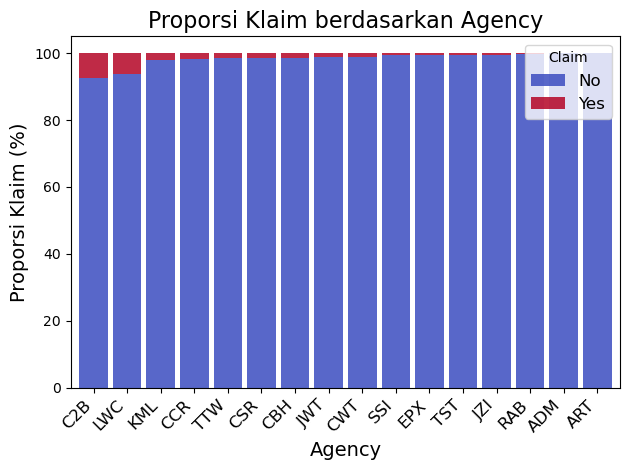

<Figure size 1400x800 with 0 Axes>

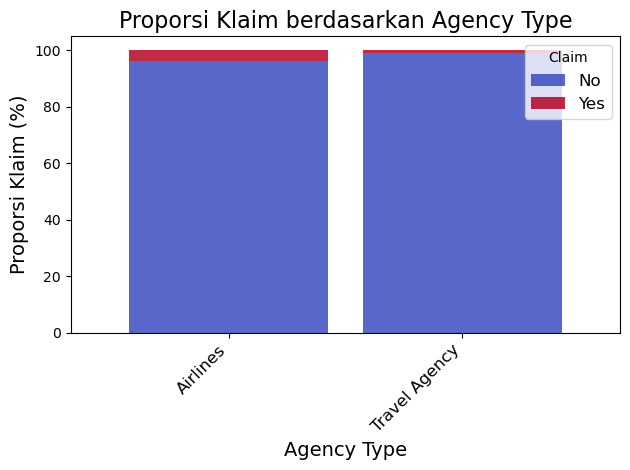

<Figure size 1400x800 with 0 Axes>

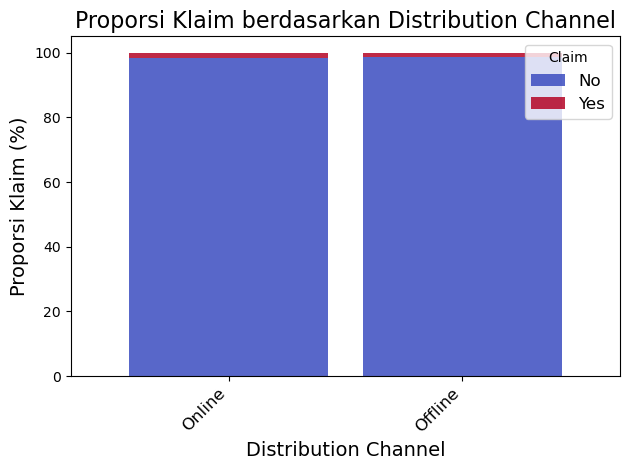

<Figure size 1400x800 with 0 Axes>

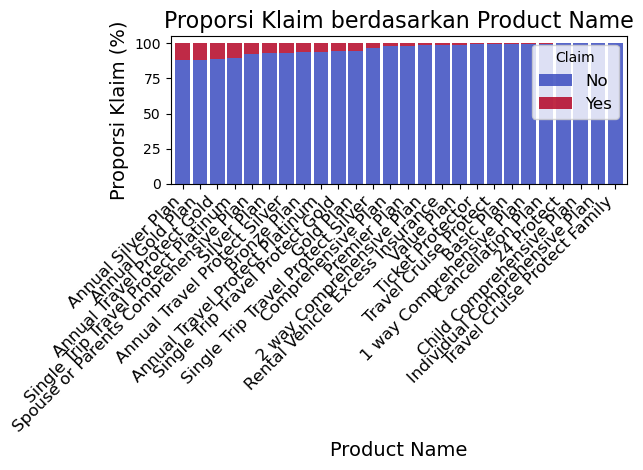

In [26]:
# Function untuk membuat bar chart dengan sorting klaim proporsi terbesar
def plot_sorted_claim_proportion(data, column):
    plt.figure(figsize=(14, 8))  # Membesarkan ukuran figure

    # Menghitung proporsi klaim dan mengurutkan berdasarkan klaim 'Yes'
    claim_proportion = data.groupby(column)['Claim'].value_counts(normalize=True).unstack() * 100
    claim_proportion_sorted = claim_proportion.sort_values(by='Yes', ascending=False)

    # Membuat bar plot
    claim_proportion_sorted.plot(kind='bar', stacked=True, colormap='coolwarm', alpha=0.85, width=0.85)  # Atur lebar bar

    # Styling
    plt.title(f'Proporsi Klaim berdasarkan {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Proporsi Klaim (%)', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotasi label agar lebih rapi
    plt.legend(title="Claim", loc='upper right', fontsize=12)

    # Tampilkan plot
    plt.tight_layout()  # Agar layout tidak terpotong
    plt.show()

# List kategori yang ingin dianalisis, tanpa 'Destination'
df_categorical = ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name']

# Loop untuk visualisasi setiap kategori (tidak termasuk 'Destination')
for col in df_categorical:
    plot_sorted_claim_proportion(df, col)

<Figure size 2000x1000 with 0 Axes>

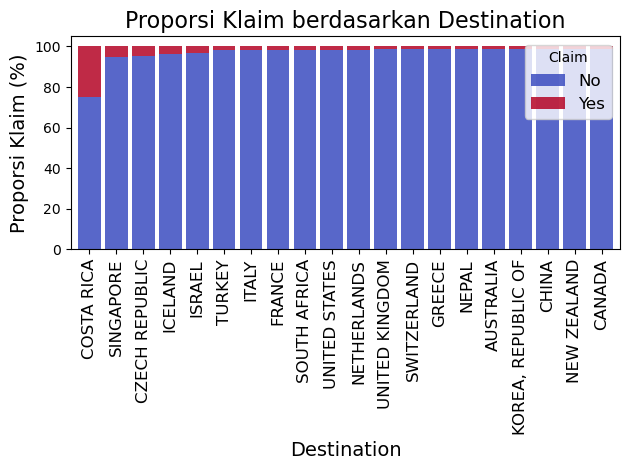

In [27]:
# Function untuk membuat bar chart dengan sorting klaim proporsi terbesar
def plot_sorted_claim_proportion(data, column, top_n=20):
    plt.figure(figsize=(20, 10))  # Membesarkan ukuran figure secara horizontal agar tidak terlalu tinggi

    # Menghitung proporsi klaim dan mengurutkan berdasarkan klaim 'Yes'
    claim_proportion = data.groupby(column)['Claim'].value_counts(normalize=True).unstack() * 100
    claim_proportion_sorted = claim_proportion.sort_values(by='Yes', ascending=False)

    # Menampilkan hanya N label teratas
    claim_proportion_sorted = claim_proportion_sorted.head(top_n)

    # Membuat bar plot
    claim_proportion_sorted.plot(kind='bar', stacked=True, colormap='coolwarm', alpha=0.85, width=0.85)  # Atur lebar bar

    # Styling
    plt.title(f'Proporsi Klaim berdasarkan {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Proporsi Klaim (%)', fontsize=14)
    plt.xticks(rotation=90, ha='center', fontsize=12)  # Rotasi label 90 derajat untuk memaksimalkan ruang
    plt.legend(title="Claim", loc='upper right', fontsize=12)

    # Tampilkan plot
    plt.tight_layout()  # Agar layout tidak terpotong
    plt.show()

# Visualisasi untuk 'Destination' dengan hanya 20 label teratas
plot_sorted_claim_proportion(df, 'Destination', top_n=20)

**Analisa pola data pada variabel kategorikal**:
1. EPX merupakan agency yang paling diminati, namun C2B dan LWC merupakan agency yang memiliki proporsi claim paling tinggi. Hal ini dapat dipengaruhi oleh penawaran produk yang berisiko tinggi, jumlah pelanggan rentan (misalnya pelanggan kategori umur lansia), kebijakan/prosedur yang lebih longgar, dsb.
2. Jenis agen travel agency memiliki lebih banyak peminat, namun airlines memiliki proporsi claim lebih tinggi. Hal ini disebabkan oleh beberapa faktor, salah satunya adalah perbedaan jenis layanan yang ditawarkan.
3. Jumlah claim pada distribusi online maupun offline memiliki persentase yang cukup seimbang. Dapat dikatakan variabel distribusi tidak memiliki pengaruh besar terhadap claim travel insurance.
4. Annual Silver Plan, Annual Gold Plan, Annual Travel Protect Gold, dan Single Trip Travel Platinum merupakan prdouct name yang memiliki proporsi claim paling tinggi. Hal ini dapat disebabkan oleh jenis layanan yang ditawarkan oleh produk dan tingkat risiko yang lebih tinggi.
5. Walaupun Singapore menjadi destinasi favorite, namun Costa Rica memiliki proporsi claim terbanyak, yang dapat disebabkan oleh beberapa faktor, diantaranya karakteristik negara tersebut, jenis produk asuransi yang ditawarkan, profil pengguna, dan risiko yang lebih tinggi.
6. Dari 5 variabel kategorikan di atas, variabel `Agency`, `Agency Type`, `Product Name`, dan `Destination` merupakan variabel yang mempengaruhi jumlah claim pada dataset travel insurance

### Analisa Pola Data Numerikal

Untuk melihat korelasi dari masing-masing data numerikal terhadap claim

In [30]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,39661.000000,39661.000000,39661.000000,39661.000000
mean,52.397822,42.342794,10.442622,39.930284
std,113.542824,50.025244,20.355921,13.526346
min,-1.000000,-357.500000,0.000000,0.000000
25%,11.000000,19.000000,0.000000,34.000000
50%,25.000000,29.000000,0.000000,36.000000
75%,57.000000,50.000000,11.880000,45.000000
max,4881.000000,810.000000,283.500000,118.000000


In [31]:
df[(df['Duration'] < 0)]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
26228,JZI,Airlines,Online,Basic Plan,-1,MALAYSIA,18.0,6.3,118,No
26494,JZI,Airlines,Online,Basic Plan,-1,BRUNEI DARUSSALAM,18.0,6.3,118,No


In [32]:
# Menghitung jumlah data dengan durasi lebih dari 365 hari
count_long_duration = df[df['Duration'] > 365].shape[0]

# Menghitung total jumlah data
total_data = df.shape[0]

# Menghitung persentase
percentage_long_duration = (count_long_duration / total_data) * 100

# Menampilkan hasil
print(f"Jumlah perjalanan lebih dari 1 tahun: {count_long_duration}")
print(f"Total data: {total_data}")
print(f"Persentase perjalanan lebih dari 1 tahun: {percentage_long_duration:.2f}%")


Jumlah perjalanan lebih dari 1 tahun: 893
Total data: 39661
Persentase perjalanan lebih dari 1 tahun: 2.25%


C:\Users\User\AppData\Local\Temp\ipykernel_10436\1028685616.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Claim', y=col, data=df, ax=axes[i], palette={'Yes': 'salmon', 'No': 'skyblue'})
C:\Users\User\AppData\Local\Temp\ipykernel_10436\1028685616.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Claim', y=col, data=df, ax=axes[i], palette={'Yes': 'salmon', 'No': 'skyblue'})
C:\Users\User\AppData\Local\Temp\ipykernel_10436\1028685616.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Claim', y=col, data=df, ax=axes[i], pal

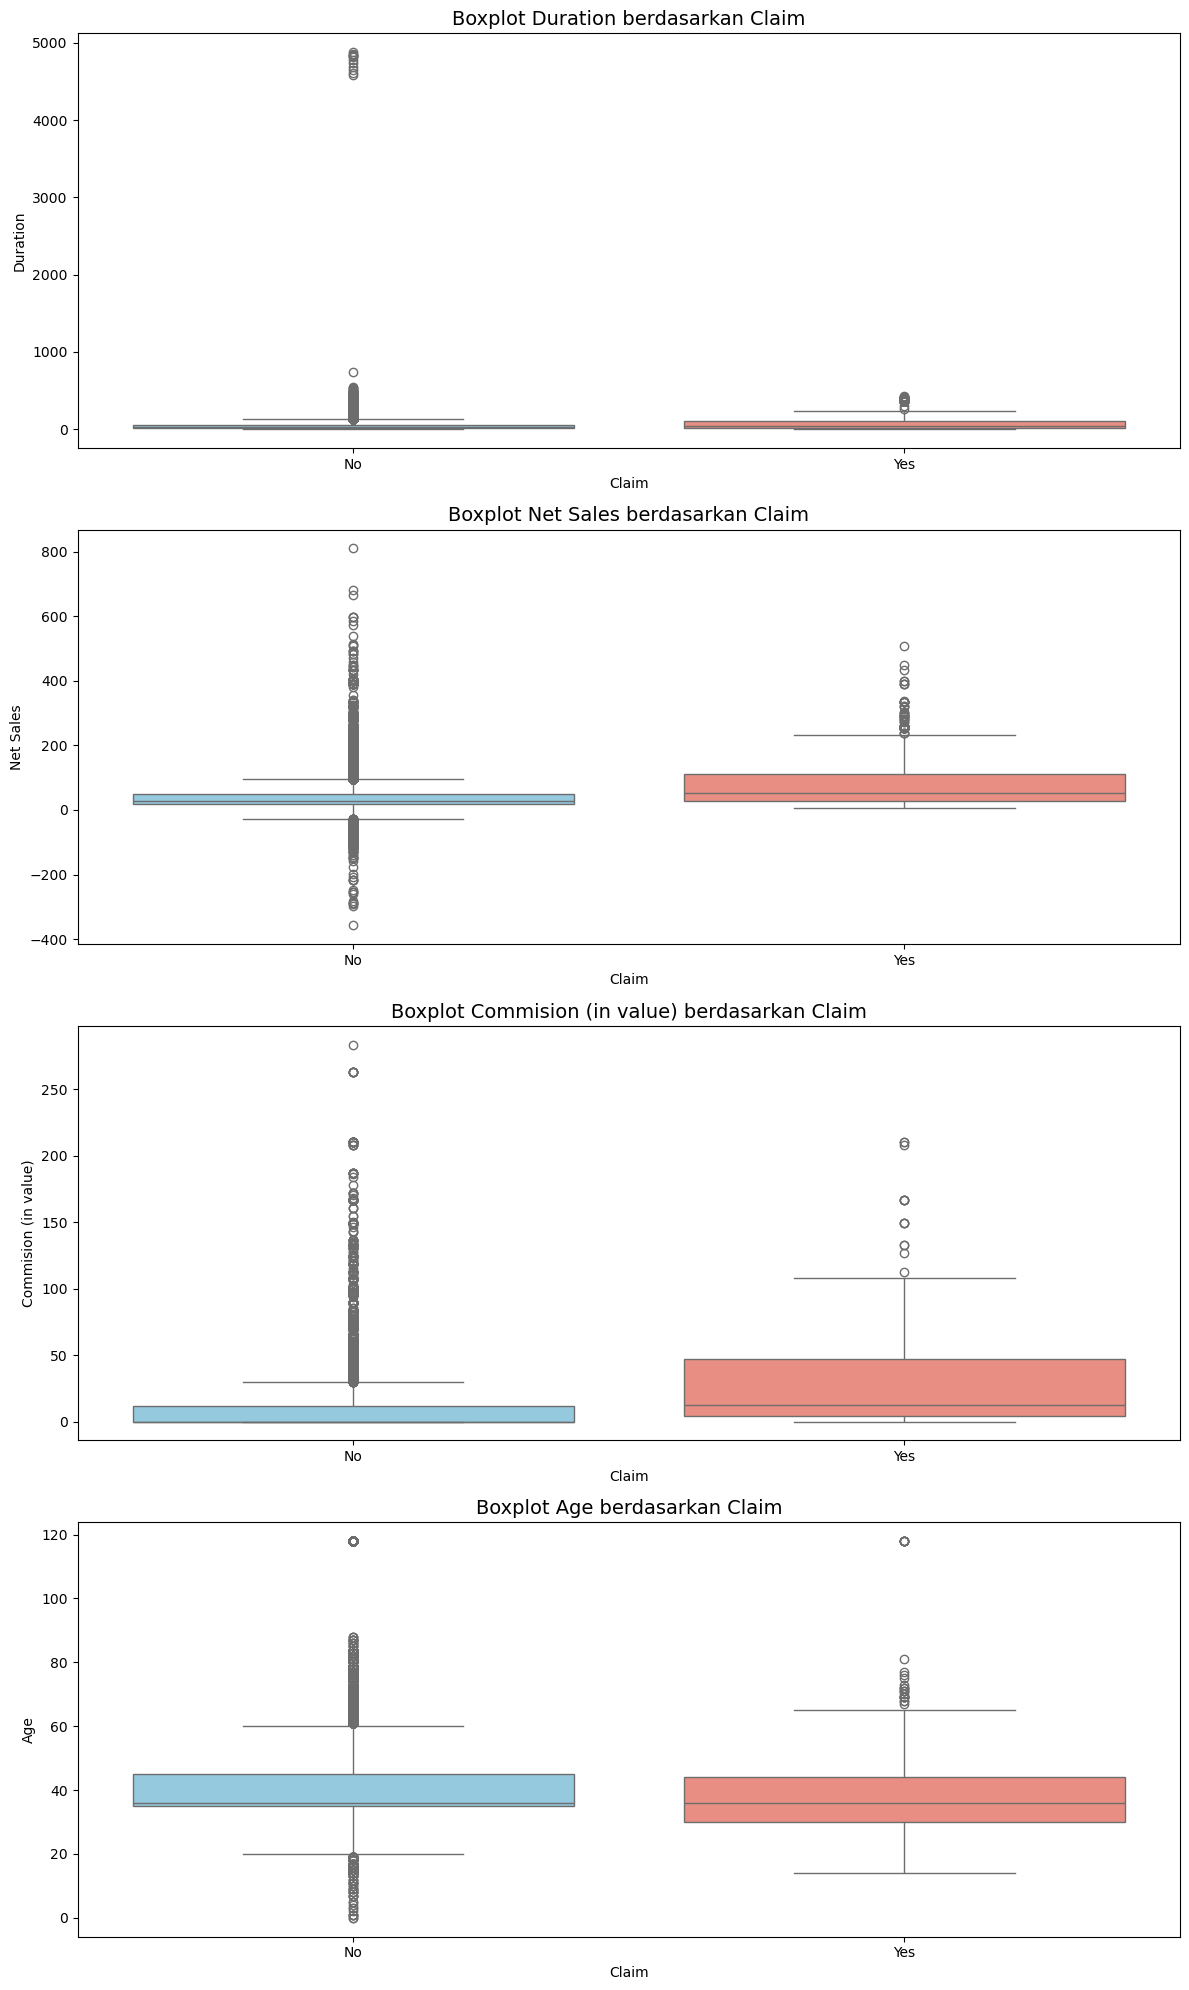

In [33]:
# visualisasi boxplot (mendeteksi outlier dan distribusi data)

# List numerical features yang akan dianalisis
numerical_columns = ['Duration', 'Net Sales', 'Commision (in value)', 'Age']

# Buat figure dan axes untuk subplot
fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(12, len(numerical_columns) * 5))

# Loop untuk membuat boxplot per fitur numerik
for i, col in enumerate(numerical_columns):
    sns.boxplot(x='Claim', y=col, data=df, ax=axes[i], palette={'Yes': 'salmon', 'No': 'skyblue'})
    axes[i].set_title(f'Boxplot {col} berdasarkan Claim', fontsize=14)
    axes[i].set_xlabel('Claim')
    axes[i].set_ylabel(col)

# Menampilkan plot
plt.tight_layout()
plt.show()

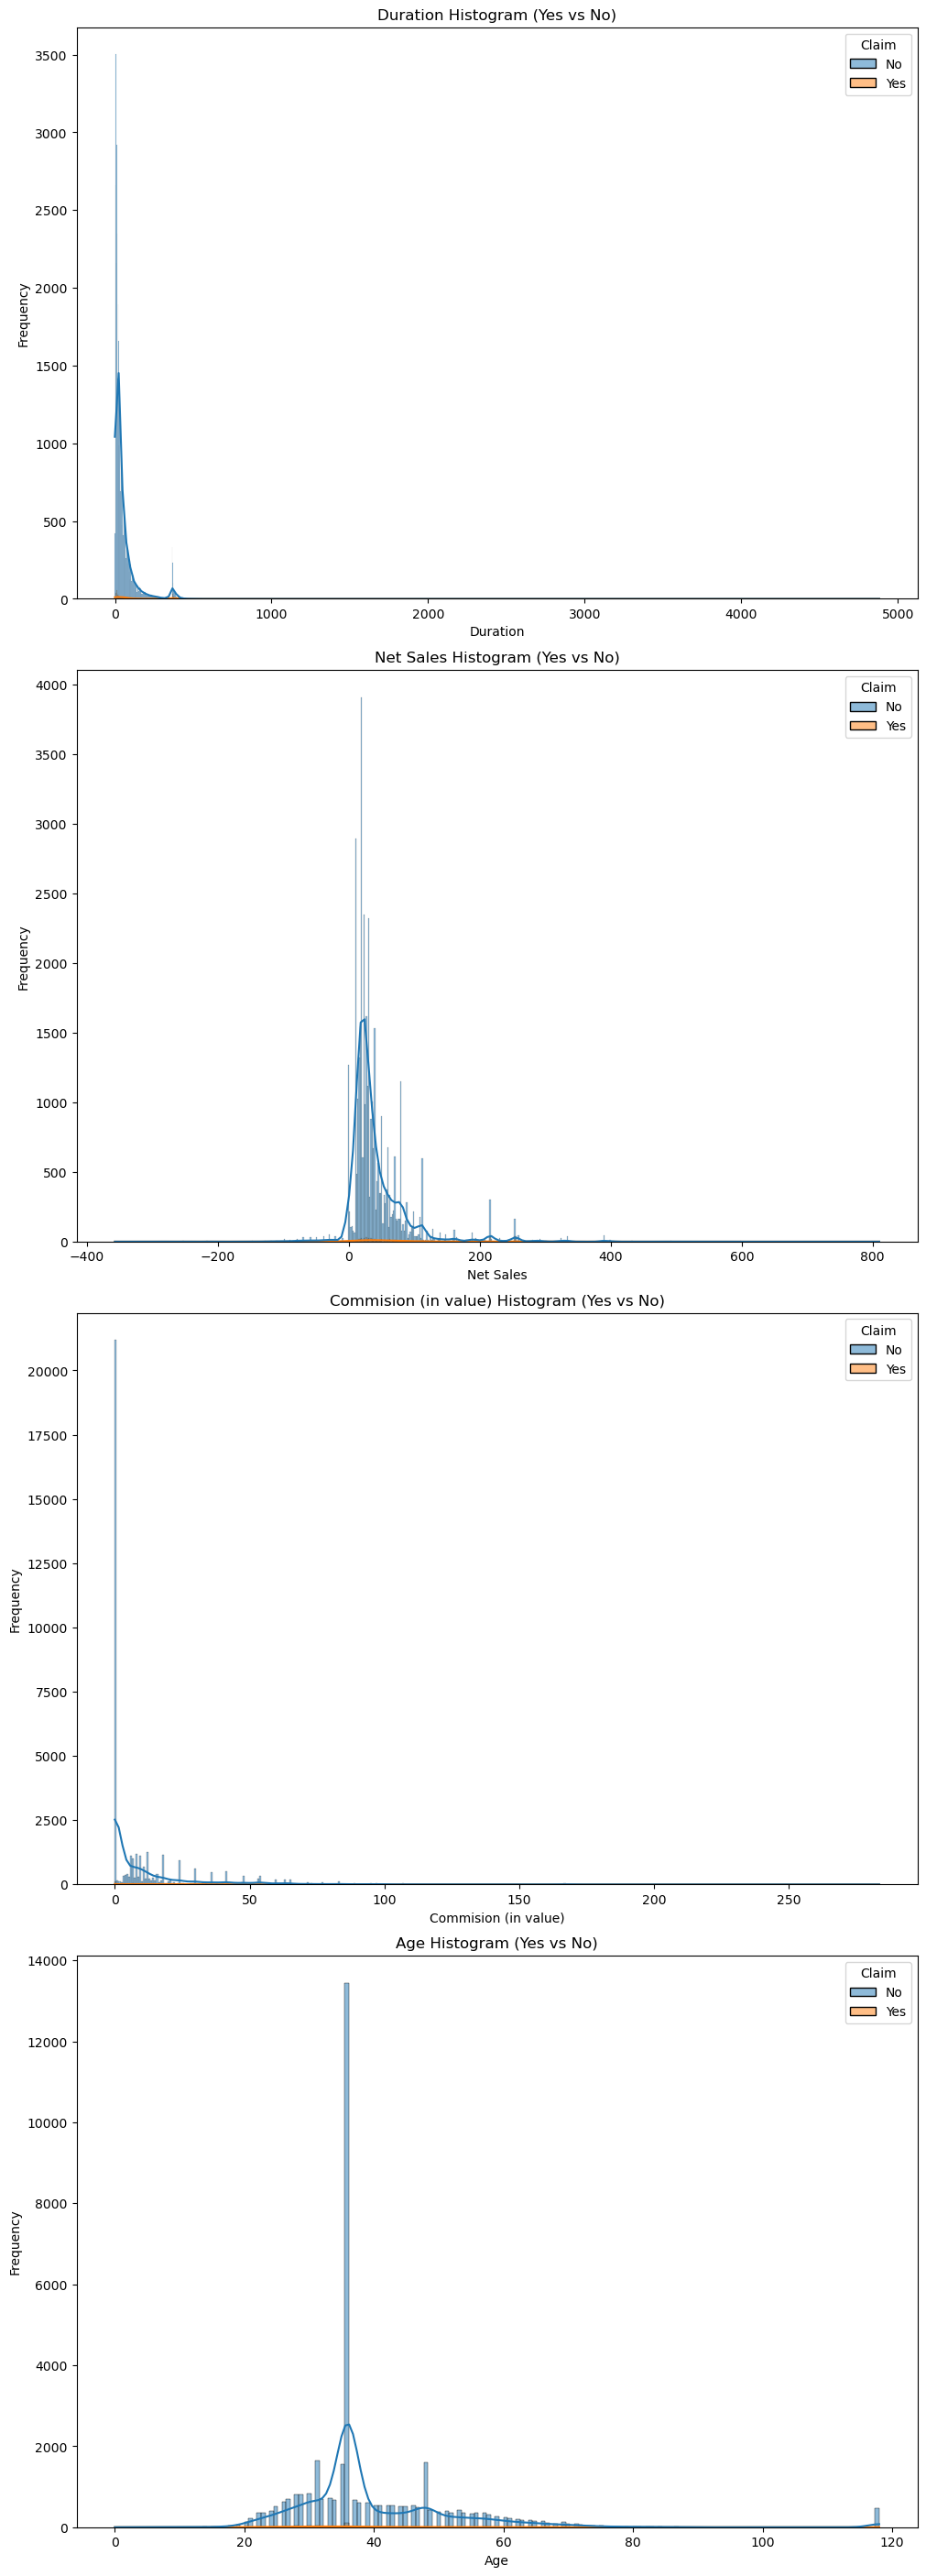

In [34]:
claim_yes = df[df['Claim'] == 'Yes']
claim_no = df[df['Claim'] == 'No']

num_cols = ['Duration', 'Net Sales', 'Commision (in value)', 'Age']

fig, axes = plt.subplots(len(num_cols), 1, figsize=(10, 28), constrained_layout=True)

for ax, col in zip(axes, num_cols):
    sns.histplot(data=df, x=col, hue='Claim', ax=ax, kde=True)
    ax.set_ylabel('Frequency')
    ax.set_xlabel(col)
    ax.set_title(f'{col} Histogram (Yes vs No)')

plt.show()

**ringkasan**
1. Nilai minimal durasi -1 dianggap anomali, karena tidak mungkin minimal durasi perjalanan <0. Nilai ini harus dihapus
2. Nilai durasi lebih dari 1 tahun (>365 hari) dianggap anomali, karena tidak masuk akal apabila asuransi menjual perjalanan lebih dari 1 tahun
3. Persebaran tiap variabel numerik tidak terdistribusi dengan normal 

In [36]:
# Menghapus data dengan Duration < 0 
df = df[df['Duration'] >= 0]

# Reset index setelah penghapusan (opsional)
df.reset_index(drop=True, inplace=True)

In [37]:
df[(df['Duration'] < 0)]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim


In [38]:
# Menghapus data dengan Duration > 365
df = df[df['Duration'] <= 365]

# Reset index setelah penghapusan (opsional)
df.reset_index(drop=True, inplace=True)

In [39]:
df[(df['Duration'] > 365)]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim


In [40]:
# Konversi kolom claim menjadi (1/0)
df['Claim'] = df['Claim'].replace({'Yes': 1, 'No': 0})
df

C:\Users\User\AppData\Local\Temp\ipykernel_10436\241845608.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Claim'] = df['Claim'].replace({'Yes': 1, 'No': 0})


,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.00,33,0
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.70,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.00,59,0
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.00,28,0
...,...,...,...,...,...,...,...,...,...,...
38761,EPX,Travel Agency,Online,2 way Comprehensive Plan,14,CHINA,30.0,0.00,36,1
38762,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,17,AUSTRALIA,79.2,47.52,47,0
38763,TST,Travel Agency,Offline,Travel Cruise Protect,64,THAILAND,30.0,10.50,50,0
38764,EPX,Travel Agency,Online,2 way Comprehensive Plan,51,CHINA,36.0,0.00,36,0


📊 Tabel Korelasi (Metode Spearman):

                      Duration  Net Sales  Commision (in value)       Age  \
Duration              1.000000   0.207833              0.036876 -0.024513   
Net Sales             0.207833   1.000000              0.233448  0.009946   
Commision (in value)  0.036876   0.233448              1.000000  0.142897   
Age                  -0.024513   0.009946              0.142897  1.000000   
Claim                 0.018885   0.072017              0.079134 -0.027293   

                         Claim  
Duration              0.018885  
Net Sales             0.072017  
Commision (in value)  0.079134  
Age                  -0.027293  
Claim                 1.000000  


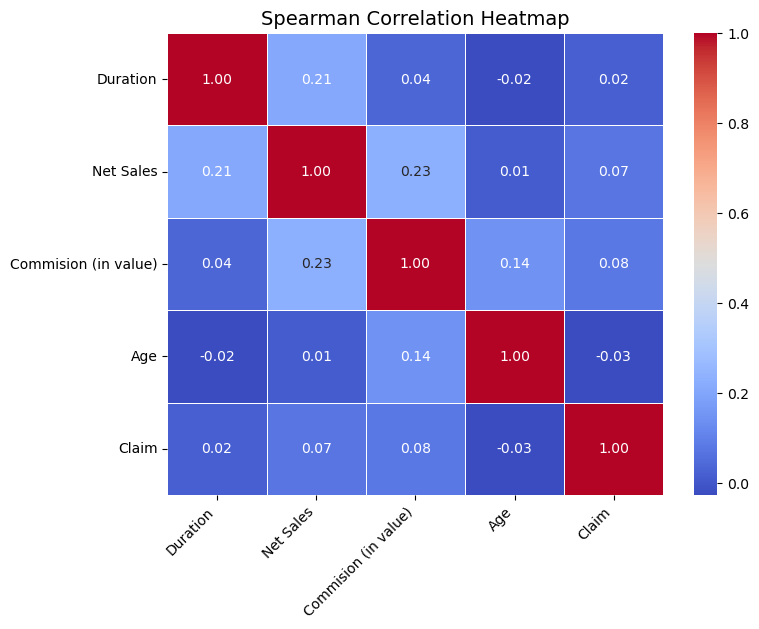

In [41]:
# # visualisai korelasi antar variabel numerik

# # Menghitung korelasi menggunakan metode Spearman
correlation_matrix = df[['Duration', 'Net Sales', 'Commision (in value)', 'Age', 'Claim']].corr(method='spearman')

# # Menampilkan tabel korelasi
print("📊 Tabel Korelasi (Metode Spearman):\n")
print(correlation_matrix)

# # Visualisasi heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# # Styling heatmap
plt.title("Spearman Correlation Heatmap", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


**Hasil Korelasi**

Hasil korelasi menunjukkan tidak ada hubungan kuat antar variabel numerik dengan klaim, yang berarti hubungan antar faktor mungkin lebih kompleks dan tidak linier.

#### Proporsi Data Claim (Yes/No)

Jumlah Data per Kategori Claim:
Claim
0    38182
1      584
Name: count, dtype: int64

Proporsi Data per Kategori Claim (%):
Claim
0    98.493525
1     1.506475
Name: proportion, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_10436\637774576.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=claim_counts.index, y=claim_counts.values, palette=['skyblue', 'salmon'])


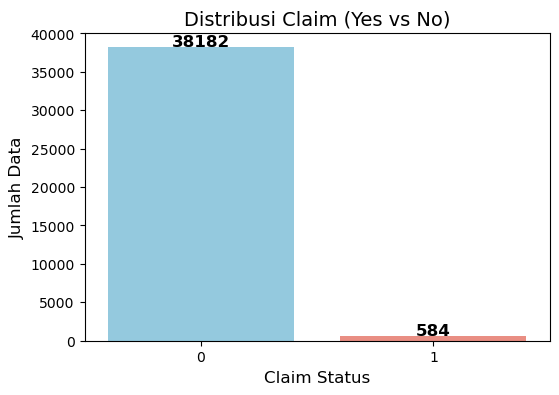

In [44]:
# Menghitung jumlah klaim "Yes" dan "No"
claim_counts = df['Claim'].value_counts()

# Menampilkan jumlah klaim
print("Jumlah Data per Kategori Claim:")
print(claim_counts)

# Menampilkan proporsi klaim dalam persen
claim_percentage = df['Claim'].value_counts(normalize=True) * 100
print("\nProporsi Data per Kategori Claim (%):")
print(claim_percentage)

# Visualisasi dengan Bar Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=claim_counts.index, y=claim_counts.values, palette=['skyblue', 'salmon'])
plt.title("Distribusi Claim (Yes vs No)", fontsize=14)
plt.xlabel("Claim Status", fontsize=12)
plt.ylabel("Jumlah Data", fontsize=12)

# Menampilkan jumlah di atas bar
for i, v in enumerate(claim_counts.values):
    plt.text(i, v + 100, str(v), ha='center', fontsize=12, fontweight='bold')

plt.show()


**Data Imbalance**:
1. Data sangat tidak seimbang, proporsi pelanggan yang tidak mengajukan claim jauh lebih besar (98%) daripada yang mengajukan claim (hanya 1,5%)
2. Model bisa bias ke data yang jumlahnya lebih dominan (No)
3. Solusi yang dapat dilakukan untuk mengatasi data imbalance adalah:
   * Melakukan resampling teknik oversampling -> menambahkan jumlah claim "Yes" (menggunakan SMOTE)
   * Melakukan resampling teknik undersampling -> mengurangi jumlah claim "No" 
   

# Data Preprocessing 

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38766 entries, 0 to 38765
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                38766 non-null  object 
 1   Agency Type           38766 non-null  object 
 2   Distribution Channel  38766 non-null  object 
 3   Product Name          38766 non-null  object 
 4   Duration              38766 non-null  int64  
 5   Destination           38766 non-null  object 
 6   Net Sales             38766 non-null  float64
 7   Commision (in value)  38766 non-null  float64
 8   Age                   38766 non-null  int64  
 9   Claim                 38766 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 3.0+ MB


In [48]:
claim_percentage = df['Claim'].value_counts(normalize=True) * 100
claim_percentage

Claim
0    98.493525
1     1.506475
Name: proportion, dtype: float64

1. Kita perlu mengonversi variabel kategorikal menjadi numerik sebelum menerapkan metode resampling. Dalam kasus ini digunakan One-Hot Encoding dan Binary Encoding.

2. Untuk menentukan metode sampling yang paling bagus, kita bisa mencoba beberapa teknik seperti SMOTE, Random Oversampling, Random Undersampling, dan ADASYN, lalu membandingkan distribusi data hasil resampling.

3. Untuk memastikan metode mana yang terbaik, dalam kasus ini akan diuji berbagai teknik cross-validation dan mengukur performa model menggunakan precision, recall, atau F1-score pada kelas Claim 1 yang lebih sedikit. Sebagai informasi, akan dijelaskan kelebihan dan kekurangan dari masing-masing metode resampling sebagai berikut:
    -  **SMOTE (Synthetic Minority Oversampling Technique)** membuat distribusi seimbang dengan meningkatkan jumlah data pada kelas minoritas (Claim=1) tanpa kehilangan data asli
    -  **Random Oversampling** membuat distribusi seimbang tanpa mengurangi data asli, tapi cenderung dapat menyebab overfitting karena menduplikasi data minoritas
    -  **Random Undersampling** membat distribusi seimbang, namun menghapus data kelas mayoritas sehingga berpotensi menghilangkan informasi penting

# Modeling & Evaluation

### Modeling w/ Full Features

In [52]:
# # Define Feature and target
X = df.drop(columns=['Claim'])
y = df['Claim']

In [53]:
# # Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [54]:
print(X_train.shape)
print(X_test.shape)

(31012, 9)
(7754, 9)


In [55]:
# Variabel kategorikal untuk One Hot Encoding dan Binary Encoding
one_hot_var = ['Agency Type', 'Distribution Channel']
binary_var = ['Agency', 'Product Name', 'Destination']

# Variabel numerik untuk scaling
numeric_var = ['Duration', 'Net Sales', 'Commision (in value)', 'Age']

# ColumnTransformer untuk preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('one_hot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), one_hot_var),
        ('binary', ce.BinaryEncoder(), binary_var),
        ('scaling', StandardScaler(), numeric_var)  # Default scaler
    ],
    remainder='passthrough'  # Untuk kolom yang tidak disebutkan
)

In [56]:
# Pastikan X_train dan X_test adalah DataFrame dengan kolom lengkap
# Fit dan transform data training
X_train_encoded = preprocessor.fit_transform(X_train)

# Transform data testing (tanpa fit ulang)
X_test_encoded = preprocessor.transform(X_test)

# Ambil nama kolom dari ColumnTransformer setelah fitting (menggabungkan nama kolom)
feature_names = preprocessor.get_feature_names_out()

# Konversi hasil encoding ke DataFrame untuk kemudahan analisis
X_train_encoded = pd.DataFrame(X_train_encoded, columns=feature_names, index=X_train.index)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=feature_names, index=X_test.index)

In [57]:
# Validasi hasil encoding
print("Jumlah baris dan kolom X_train setelah encoding:", X_train_encoded.shape)
print("Jumlah baris dan kolom X_test setelah encoding:", X_test_encoded.shape)

# Cek jika ada NaN di data hasil encoding
print("Jumlah nilai NaN di X_train:", X_train_encoded.isnull().sum().sum())
print("Jumlah nilai NaN di X_test:", X_test_encoded.isnull().sum().sum())

# Pastikan tidak ada nilai NaN
if X_train_encoded.isnull().sum().sum() > 0 or X_test_encoded.isnull().sum().sum() > 0:
    raise ValueError("Ada nilai NaN di hasil encoding. Periksa input data atau preprocessing.")

Jumlah baris dan kolom X_train setelah encoding: (31012, 25)
Jumlah baris dan kolom X_test setelah encoding: (7754, 25)
Jumlah nilai NaN di X_train: 0
Jumlah nilai NaN di X_test: 0


In [58]:
X_train_encoded.head()

,one_hot__Agency Type_Airlines,one_hot__Agency Type_Travel Agency,one_hot__Distribution Channel_Offline,one_hot__Distribution Channel_Online,binary__Agency_0,binary__Agency_1,binary__Agency_2,binary__Agency_3,binary__Agency_4,binary__Product Name_0,...,binary__Destination_1,binary__Destination_2,binary__Destination_3,binary__Destination_4,binary__Destination_5,binary__Destination_6,scaling__Duration,scaling__Net Sales,scaling__Commision (in value),scaling__Age
19195,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.610158,-0.959522,1.208834,0.525284
27014,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.201672,1.278629,2.598118,0.228628
25548,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,-0.574638,-0.457131,-0.235414,-0.883831
16484,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.142685,0.045260,0.290830,-0.513011
32806,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.432555,0.070379,-0.527772,-0.290519


In [59]:
X_test_encoded.head()

,one_hot__Agency Type_Airlines,one_hot__Agency Type_Travel Agency,one_hot__Distribution Channel_Offline,one_hot__Distribution Channel_Online,binary__Agency_0,binary__Agency_1,binary__Agency_2,binary__Agency_3,binary__Agency_4,binary__Product Name_0,...,binary__Destination_1,binary__Destination_2,binary__Destination_3,binary__Destination_4,binary__Destination_5,binary__Destination_6,scaling__Duration,scaling__Net Sales,scaling__Commision (in value),scaling__Age
20307,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,-0.521357,1.775996,3.292760,0.376956
31933,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,-0.592398,1.029946,2.250797,-0.290519
147,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.734480,-0.482251,-0.527772,-0.290519
26809,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.189054,-0.959522,-0.204424,-0.735503
11730,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,2.497891,-0.708326,-0.527772,-0.290519


In [60]:
import time

# Random Under Sampling
rus = RandomUnderSampler(random_state=42)  # Inisialisasi RandomUnderSampler
X_resampled, y_resampled = rus.fit_resample(X_train_encoded, y_train)  # Lakukan undersampling pada data training


# Pipeline hanya untuk classifier dan scaler
pipeline = Pipeline([
    ('classifier', LogisticRegression(random_state=42))  # Default classifier
])


# Definisikan grid untuk model classifier dan scaler
param_grid = {
    'classifier': [
        LogisticRegression(class_weight='balanced', random_state=42),
        SGDClassifier(class_weight='balanced', random_state=42),
        KNeighborsClassifier(),
        DecisionTreeClassifier(class_weight='balanced', random_state=42),
        AdaBoostClassifier(random_state=42),
        GradientBoostingClassifier(random_state=42),
        XGBClassifier(scale_pos_weight=10, random_state=42, use_label_encoder=False, eval_metric='logloss')
    ]
}

# Gunakan GridSearchCV untuk mencari kombinasi terbaik dengan ROC AUC scoring
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)


# Mulai waktu
start_time = time.time()

# Fit grid_search pada data yang sudah diresample
grid_search.fit(X_resampled, y_resampled)

# Hitung waktu yang telah berlalu
end_time = time.time()
elapsed_time = end_time - start_time
minutes = int(elapsed_time // 60) 
seconds = int(elapsed_time % 60)

# Tampilkan parameter terbaik dan skor terbaik
print("Best Model:", grid_search.best_estimator_)
print("Best Score (ROC AUC):", grid_search.best_score_)

# Evaluasi di data testing
y_pred = grid_search.best_estimator_.predict(X_test_encoded)
y_pred_proba = grid_search.best_estimator_.predict_proba(X_test_encoded)[:, 1]

# ROC AUC Score dan laporan evaluasi
print("ROC AUC Score on Test Data:", roc_auc_score(y_test, y_pred_proba))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Elapsed Time:", minutes, "minutes", seconds, "seconds")

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Model: Pipeline(steps=[('classifier', GradientBoostingClassifier(random_state=42))])
Best Score (ROC AUC): 0.7931729901132342
ROC AUC Score on Test Data: 0.7795768240314529
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.76      0.86      7637
           1       0.04      0.64      0.07       117

    accuracy                           0.76      7754
   macro avg       0.52      0.70      0.47      7754
weighted avg       0.98      0.76      0.85      7754

Elapsed Time: 0 minutes 5 seconds


In [61]:
grid_search.best_estimator_

Pipeline(steps=[('classifier', GradientBoostingClassifier(random_state=42))])

**Kesimpulan hasil Base Modeling:**

Dari hasil prediksi Base Model, didapat ringkasan sebagai berikut:
* Model terbaik: GradientBoostingClassifier dengan menggunakan Random Under Sampling untuk mengatasi ketidakseimbangan data
* ROC AUC Score pada data train: 0,79 menunjukkan bahwa kemampuan model untuk membedakan antara dua kelas (kelas 0 dan kelas 1) cukup baik pada data train.
* ROC AUC Score pada data test: 0,77 menunjukkan bahwa model mampu generalisasi dengan baik pada data yang belum terlihat

Selanjutnya, akan diuji coba untuk menggunakan model dengan feature pilihan dan model akan menggunakan GradientBoostingClassifier karena memiliki score paling tinggi.

### Modeling w/ Selected Features

In [64]:
# # Feature Selection Preprocess

# Membuat dan melatih model GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train_encoded, y_train)

# Mengambil fitur yang penting
feature_importances = model.feature_importances_

In [65]:
# # Memilih Fitur
from sklearn.feature_selection import RFE, SelectFromModel

# Mendapatkan nama fitur setelah encoding
feature_names_encoded = X_train_encoded.columns  # Pastikan dataset encoded adalah DataFrame

# Melatih selector
selector = SelectFromModel(model, threshold="mean")
selector.fit(X_train_encoded, y_train)

# Mendapatkan nama fitur yang dipilih
selected_features = feature_names_encoded[selector.get_support()]
selected_features.tolist()

['binary__Agency_3',
 'binary__Product Name_4',
 'scaling__Duration',
 'scaling__Net Sales',
 'scaling__Commision (in value)',
 'scaling__Age']

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, classification_report
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline
import time

# Transformasi data menggunakan fitur-fitur yang telah dipilih
X_train_selected = selector.transform(X_train_encoded)
X_test_selected = selector.transform(X_test_encoded)

# Terapkan RandomUnderSampler di luar pipeline
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_selected, y_train)

# Pipeline hanya untuk classifier
pipeline = Pipeline([
    ('classifier', GradientBoostingClassifier(random_state=42))  # Model GradientBoostingClassifier
])

# Definisikan grid untuk classifier (jika diperlukan tuning tambahan di masa depan)
param_grid = {
    'classifier': [
        GradientBoostingClassifier(random_state=42)
    ]  # Jika ingin hanya pakai model ini tanpa variasi, bisa langsung set ini
}

# Mulai waktu eksekusi
start_time = time.time()

# GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV pada data yang sudah di-resample
grid_search.fit(X_train_resampled, y_train_resampled)

# Hitung waktu eksekusi
elapsed_time = time.time() - start_time
minutes = int(elapsed_time // 60)
seconds = int(elapsed_time % 60)

# Hasil terbaik dari GridSearchCV
print("Best Model (Gradient Boosting):", grid_search.best_estimator_)
print("Best ROC AUC Score (Train):", grid_search.best_score_)

# Evaluasi model terbaik di data testing
y_pred_proba = grid_search.best_estimator_.predict_proba(X_test_selected)[:, 1]
y_pred = grid_search.best_estimator_.predict(X_test_selected)

# Tampilkan metrik evaluasi
print("ROC AUC Score on Test Data:", roc_auc_score(y_test, y_pred_proba))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Tampilkan waktu yang telah berlalu
print("Elapsed Time:", minutes, "minutes", seconds, "seconds")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Model (Gradient Boosting): Pipeline(steps=[('classifier', GradientBoostingClassifier(random_state=42))])
Best ROC AUC Score (Train): 0.7993461302868614
ROC AUC Score on Test Data: 0.7679885040105022
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.76      0.86      7637
           1       0.04      0.64      0.08       117

    accuracy                           0.76      7754
   macro avg       0.52      0.70      0.47      7754
weighted avg       0.98      0.76      0.85      7754

Elapsed Time: 0 minutes 1 seconds


**Kesimpulan hasil modeling w/ features**:
1. Score ROC-AUC menunjukkan performa model cukup konsisten antara data training dan data testing, model tidak mengalami overfitting dan dapat men-generalisasi pola pada data testing
2. Meskipun score ROC-AUC pada data testing menurun, namun nilai di atas 0,7 umumnya menunjukkan performa yang cukup baik dalam memprediksi perbedaan kelas negatif dan positif
3. Model menggunakan fitur pilihan `feature_importance` untuk mengevaluasi fitur di dalam dataset yang mempengaruhi prediksi model
4. Metode resampling menggunakan Random Under Sampling

### Modeling & Tuning

In [196]:
# Transformasi data menggunakan fitur-fitur yang telah dipilih
X_train_selected = selector.transform(X_train_encoded)
X_test_selected = selector.transform(X_test_encoded)

# Terapkan RandomUnderSampler di luar pipeline
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_selected, y_train)

# Pipeline hanya untuk classifier
pipeline = Pipeline([
    ('classifier', GradientBoostingClassifier(random_state=42))  # Model GradientBoostingClassifier
])

# Definisikan grid untuk hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [50, 100, 200],         # Jumlah pohon dalam ensemble
    'classifier__learning_rate': [0.01, 0.1, 0.2],     # Kecepatan pembelajaran
    'classifier__max_depth': [3, 5, 7],                # Kedalaman maksimum pohon
    'classifier__subsample': [0.8, 1.0],               # Proporsi sampel untuk tiap pohon
    'classifier__min_samples_split': [2, 5, 10]        # Minimum sampel untuk split
}

# Mulai waktu eksekusi
start_time = time.time()

# GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,                         # 5-fold cross-validation
    scoring='roc_auc',            # Gunakan metrik ROC AUC untuk evaluasi
    n_jobs=-1,                    # Gunakan semua core yang tersedia
    verbose=1                     # Tampilkan log selama proses
)

# Fit GridSearchCV pada data yang sudah di-resample
grid_search.fit(X_train_resampled, y_train_resampled)

# Hitung waktu eksekusi
elapsed_time = time.time() - start_time
minutes = int(elapsed_time // 60)
seconds = int(elapsed_time % 60)

# Hasil terbaik dari GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)
print("Best ROC AUC Score (Train):", grid_search.best_score_)

# Evaluasi model terbaik di data testing
y_pred_proba = grid_search.best_estimator_.predict_proba(X_test_selected)[:, 1]
y_pred = grid_search.best_estimator_.predict(X_test_selected)

# Tampilkan metrik evaluasi
print("ROC AUC Score (Test Data):", roc_auc_score(y_test, y_pred_proba))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Tampilkan waktu yang telah berlalu
print("Elapsed Time:", minutes, "minutes", seconds, "seconds")

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Hyperparameters: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100, 'classifier__subsample': 1.0}
Best ROC AUC Score (Train): 0.8088727512466083
ROC AUC Score (Test Data): 0.7787408131129488
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.83      0.91      7637
           1       0.05      0.58      0.09       117

    accuracy                           0.83      7754
   macro avg       0.52      0.71      0.50      7754
weighted avg       0.98      0.83      0.89      7754

Elapsed Time: 2 minutes 50 seconds


In [70]:
grid_search.best_estimator_

Pipeline(steps=[('classifier',
                 GradientBoostingClassifier(learning_rate=0.01,
                                            random_state=42))])

**Kesimpulan hasil modeling w/ tuning**:
1. Gap yang kecil antara Train dan Test menunjukkan bahwa model tidak overfitting pada data pelatihan.
2. Namun, ROC AUC di Test (0.7787) masih di bawah ideal (>0.8), yang menunjukkan ruang untuk perbaikan, terutama dalam menangani kelas minoritas.
3. Nilai precision, recall, dan F-1 Score untuk kelas positif yang cenderung lebih kecil dari kelas negatif menunjukkan bahwa model lebih fokus memprediksi kelas mayoritas (0) dan kesulitan memprediksi kelas minoritas (1).
4. Precision rendah pada kelas minoritas menunjukkan model sering salah memprediksi kelas mayoritas sebagai kelas minoritas (False Positive).


In [72]:
# Base Modeling: Sebelum feature selection
pipeline_base = Pipeline([
    ('classifier', GradientBoostingClassifier(random_state=42))  # Base GradientBoostingClassifier
])
pipeline_base.fit(X_resampled, y_resampled)  # Tanpa feature selection
y_pred_base_proba = pipeline_base.predict_proba(X_test_encoded)[:, 1]
y_pred_base = pipeline_base.predict(X_test_encoded)
roc_auc_base = roc_auc_score(y_test, y_pred_base_proba)

# Modeling dengan Feature Selection
pipeline_features = Pipeline([
    ('classifier', GradientBoostingClassifier(random_state=42))  # Model GradientBoostingClassifier
])
pipeline_features.fit(X_train_resampled, y_train_resampled)  # Menggunakan feature selection
y_pred_features_proba = pipeline_features.predict_proba(X_test_selected)[:, 1]
y_pred_features = pipeline_features.predict(X_test_selected)
roc_auc_features = roc_auc_score(y_test, y_pred_features_proba)

# Modeling + Hyperparameter Tuning (Hasil GridSearch)
y_pred_tuned_proba = grid_search.best_estimator_.predict_proba(X_test_selected)[:, 1]
y_pred_tuned = grid_search.best_estimator_.predict(X_test_selected)
roc_auc_tuned = roc_auc_score(y_test, y_pred_tuned_proba)

# Bandingkan hasilnya
print("ROC AUC Base Model (Tanpa Feature Selection):", roc_auc_base)
print("ROC AUC Setelah Feature Selection:", roc_auc_features)
print("ROC AUC Setelah Feature Selection + Tuning:", roc_auc_tuned)

ROC AUC Base Model (Tanpa Feature Selection): 0.7795768240314529
ROC AUC Setelah Feature Selection: 0.7679885040105022
ROC AUC Setelah Feature Selection + Tuning: 0.7787408131129488


In [73]:
# Tampilkan classification report untuk setiap model
print("\nClassification Report Base Model:\n", classification_report(y_test, y_pred_base))
print("\nClassification Report Feature Selection:\n", classification_report(y_test, y_pred_features))
print("\nClassification Report Tuning:\n", classification_report(y_test, y_pred_tuned))



Classification Report Base Model:
               precision    recall  f1-score   support

           0       0.99      0.76      0.86      7637
           1       0.04      0.64      0.07       117

    accuracy                           0.76      7754
   macro avg       0.52      0.70      0.47      7754
weighted avg       0.98      0.76      0.85      7754


Classification Report Feature Selection:
               precision    recall  f1-score   support

           0       0.99      0.76      0.86      7637
           1       0.04      0.64      0.08       117

    accuracy                           0.76      7754
   macro avg       0.52      0.70      0.47      7754
weighted avg       0.98      0.76      0.85      7754


Classification Report Tuning:
               precision    recall  f1-score   support

           0       0.99      0.83      0.91      7637
           1       0.05      0.58      0.09       117

    accuracy                           0.83      7754
   macro avg     

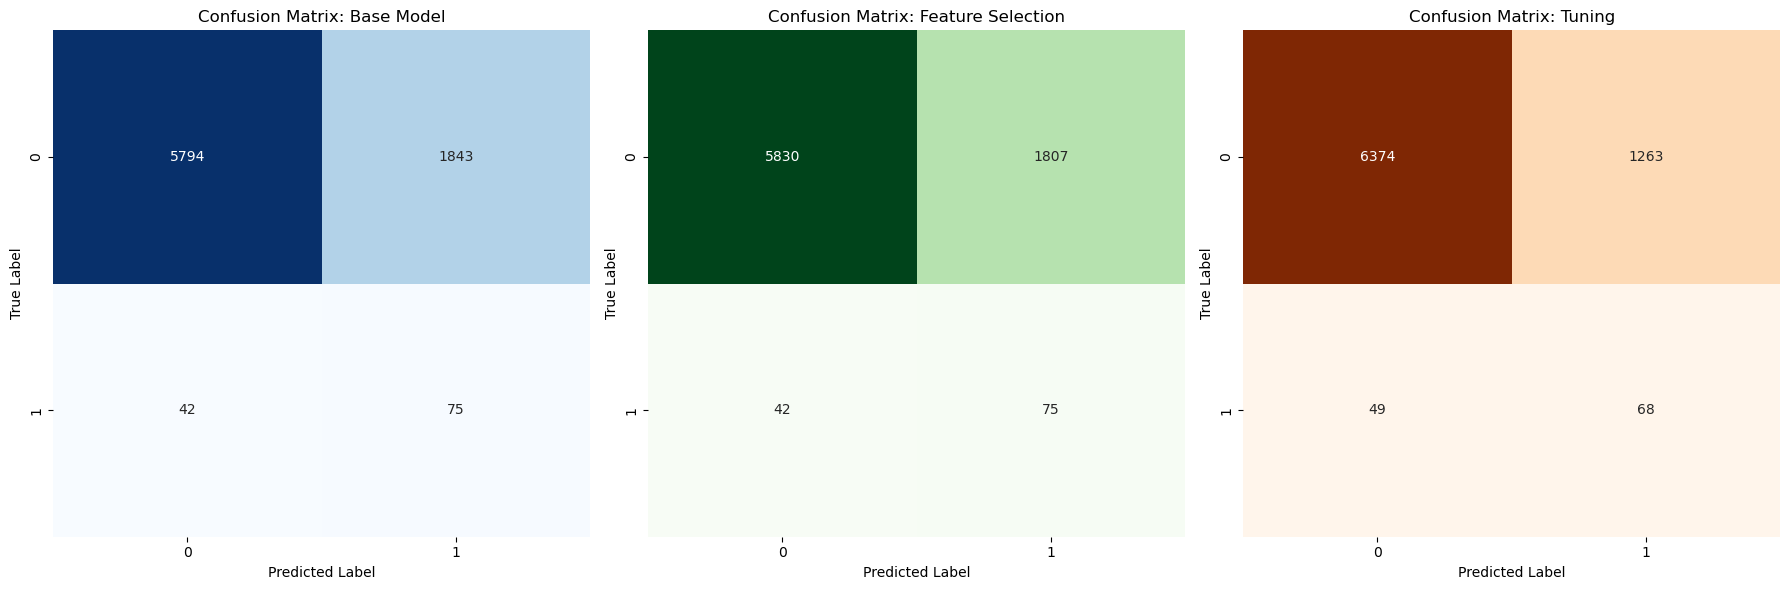

In [74]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrices for each model
cm_base = confusion_matrix(y_test, y_pred_base)
cm_features = confusion_matrix(y_test, y_pred_features)
cm_tuned = confusion_matrix(y_test, y_pred_tuned)

# Plot heatmaps for each confusion matrix
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Base Model Confusion Matrix
sns.heatmap(cm_base, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[0])
axes[0].set_title("Confusion Matrix: Base Model")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")
axes[0].xaxis.set_ticklabels(['0', '1'])
axes[0].yaxis.set_ticklabels(['0', '1'])

# Feature Selection Confusion Matrix
sns.heatmap(cm_features, annot=True, fmt="d", cmap="Greens", cbar=False, ax=axes[1])
axes[1].set_title("Confusion Matrix: Feature Selection")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")
axes[1].xaxis.set_ticklabels(['0', '1'])
axes[1].yaxis.set_ticklabels(['0', '1'])

# Tuning Confusion Matrix
sns.heatmap(cm_tuned, annot=True, fmt="d", cmap="Oranges", cbar=False, ax=axes[2])
axes[2].set_title("Confusion Matrix: Tuning")
axes[2].set_xlabel("Predicted Label")
axes[2].set_ylabel("True Label")
axes[2].xaxis.set_ticklabels(['0', '1'])
axes[2].yaxis.set_ticklabels(['0', '1'])

# Adjust layout
plt.tight_layout()
plt.show()


# Save Model

In [170]:
# Save the best model

import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(grid_search.best_estimator_, file)

print("Model has been saved as 'best_model.pkl'")

Model has been saved as 'best_model.pkl'


In [172]:
# import os
# print("Current working directory:", os.getcwd())

In [168]:
# Load the saved model
with open('best_model.pkl', 'rb') as file:
    best_model = pickle.load(file)

# Use the loaded model for predictions
y_pred_proba = best_model.predict_proba(X_test_selected)[:, 1]
y_pred = best_model.predict(X_test_selected)

# Evaluate model performance
print("ROC AUC Score (Test Data):", roc_auc_score(y_test, y_pred_proba))
print("Classification Report:\n", classification_report(y_test, y_pred))

ROC AUC Score (Test Data): 0.7787408131129488
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.83      0.91      7637
           1       0.05      0.58      0.09       117

    accuracy                           0.83      7754
   macro avg       0.52      0.71      0.50      7754
weighted avg       0.98      0.83      0.89      7754



In [180]:
import joblib

# Save the best model (grid_search.best_estimator_) to a .sav file
filename = 'best_model.sav'
joblib.dump(grid_search.best_estimator_, filename)

print(f"Model has been saved as '{filename}'")

Model has been saved as 'best_model.sav'


In [198]:
# Combine the preprocessor and feature selector into a pipeline
preprocessing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', selector)
])

# Save the preprocessor and feature selector (no model)
with open('preprocessor_selector.pkl', 'wb') as f:
    pickle.dump(preprocessing_pipeline, f)

# Conclusion

### Best Model

Telah dilakukan modeling menggunakan 3 kondisi, diantaranya Model with Full Features, Model with Feature Selection, dan Model with Feature Selction and Tuning. Berdasarkan perbandingan 3 model machine learning tersebut, dapat disimpulkan bahwa model terbaik dalam kasus prediksi klaim adalah sebagai berikut:
1. Best Model adalah GradientBoostingClassifier dengan parameter:
   * kedalaman pohon (max_depth): 3
   * n estimator: 10
2. Imbalance Treatmant: Random Under Sampling
3. Feature selection menggunakan teknik feature importance.

Score ROC-AUC sebesar 0,77 menunjukkan model tersebut memiliki kemampuan klasifikasi yang baik, khususnya untuk memprediksi kelas positive yang minoritas (claim). Namun, Secara keseluruhan, hasil menunjukkan bahwa model memiliki kinerja yang baik dalam hal precision dan recall untuk kelas 0, namun kurang memuaskan untuk kelas 1. Precision yang rendah dan skor F1 untuk kelas 1 mengindikasikan bahwa model kesulitan dalam memprediksi instance dari kelas 1 dengan akurat.

C:\Users\User\AppData\Local\Temp\ipykernel_10436\1030705594.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=selected_features_df, x='Importance', y='Feature', palette='viridis')


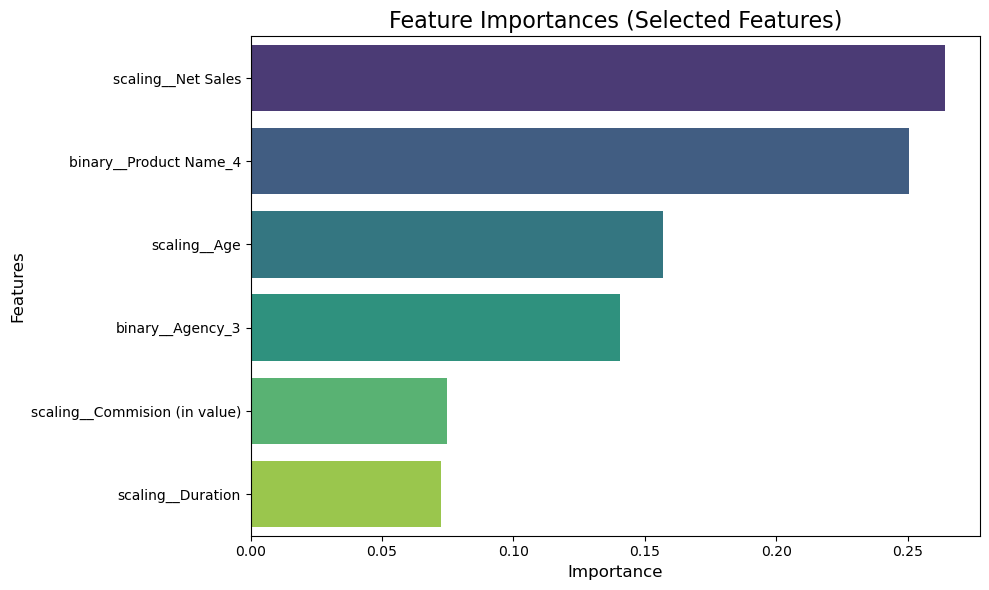

In [79]:
# Membuat DataFrame untuk fitur yang dipilih dan importancenya
feature_importances_df = pd.DataFrame({
    'Feature': feature_names_encoded,
    'Importance': feature_importances
})

# Memfilter hanya fitur yang dipilih berdasarkan selector
selected_features_df = feature_importances_df[feature_importances_df['Feature'].isin(selected_features)]

# Mengurutkan fitur berdasarkan importance
selected_features_df = selected_features_df.sort_values(by='Importance', ascending=False)

# Visualisasi menggunakan bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=selected_features_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importances (Selected Features)', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()


Dari hasil pemilihan fitur dari dataset, terlihat 2 (Dua) fitur yang memiliki pengaruh paling besar pada target claim, yaitu:
1. **Net Sales**

   Polis dengan nilai penjualan lebih tinggi sering kali mencakup lebih banyak perlindungan (coverage) atau melibatkan pelanggan yang sering melakukan perjalanan. Hal ini meningkatkan probabilitas klaim karena lebih sering terekspos risiko perjalanan.
3. **Product Name**

   Setiap produk asuransi mungkin menawarkan cakupan yang berbeda, seperti perlindungan untuk keterlambatan penerbangan, kehilangan bagasi, atau pembatalan perjalanan. Produk tertentu mungkin lebih relevan dengan situasi yang berisiko tinggi untuk klaim.

### Bisnis

1. Fitur `Product Name` menunjukkan bahwa produk asuransi tertentu lebih sering terkait dengan klaim. Hal ini mengindikasikan bahwa beberapa produk memiliki risiko lebih tinggi dibandingkan yang lain. Oleh karena itu, perusahaan dapat menyesuaikan premi asuransi untuk produk dengan cakupan risiko tinggi.
2. Fitur `Net Sales` yang berpengaruh besar menunjukkan bahwa polis dengan nilai penjualan tinggi lebih sering terkait dengan klaim. Ini dapat terjadi karena pelanggan dengan polis lebih mahal mungkin memiliki cakupan yang lebih luas atau frekuensi perjalanan yang tinggi. Sehingga perusahaan dapat mengoptimalkan pemrosesan klaim untuk pelanggan dengan nilai polis tinggi.
3. Estimasi Cost pada Claim

   * Claim actual = 117

   * Asumsi harga claim = $500

   * Recall = 0.58 (model memprediksi 58% klaim yang sebenarnya ada)

   * Predicted Claim (TP) = 117 * 0.58 = 68

   * Missed Claim (FN)= 117 - 68 = 49

**Estimasi Cost dari Claim yang tidak terprediksi**

Claim yang salah ditolak dapat menyebabkan ketidak puasan pelanggan dan potensi kerugian bisnis. Estimasi biaya kerugian adalah sebagai berikut:
       
        FN Cost = FN x Harga Claim

Estimasi biaya kerugian claim +/- $24.500
            

**Estimasi dari Claim yang berhasil diprediksi**

Claim yang benar terprediksi sebagai positif akan diestimasi biaya pengeluaran perusahaan untuk membayar klaim yang sah. Estimasi biaya pengeluaran untuk claim adalah sebagai berikut:

        TP Cost = TP x Harga Claim

Estimasi biaaya pengeluaran untuk claim +/- $34.000

# Recommendation

1. Model perlu dioptimalkan untuk meningkatkan recall dan precision pada klaim positif (kelas 1). Ini akan mengurangi jumlah klaim yang salah ditolak (FN) dan meningkatkan akurasi prediksi.
   * Pemilihan metode resampling
   * Menambahkan fitur baru yang lebih relevan
2. Identifikasi lebih mendalam produk yang sering terkait dengan klaim dan lakukan penyesuaian premi atau pengelolaan risiko untuk mengurangi frekuensi klaim.
3. Untuk pelanggan dengan polis bernilai tinggi, berikan panduan tentang risiko perjalanan yang lebih jelas untuk mengurangi potensi klaim.